In [1]:
# importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [2]:
# importing data
avocados=pd.read_csv('/Users/hlind/Downloads/avocados.csv')

# does the total volume of avocados sold differ between indianapolis, orlando, and phoenixtucson?

In [3]:
avocados.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# filtering data
cities=['Indianapolis', 'Orlando', 'PhoenixTucson']
avos1=avocados['region'].isin(cities)
avos2=avocados[avos1].copy()

In [5]:
# keeping the needed variables
avos=avos2[['Total Volume', 'region']]

In [6]:
# checking for integers
avos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014 entries, 988 to 18008
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Total Volume  1014 non-null   float64
 1   region        1014 non-null   object 
dtypes: float64(1), object(1)
memory usage: 23.8+ KB


In [7]:
# recoding region
regionR={'Indianapolis':0, 'Orlando':1, 'PhoenixTucson':2}
avos['region'] = avos.region.replace(regionR)

/var/folders/xf/chkgnkz55mvbhswk6vjbb9680000gn/T/ipykernel_5018/3337040287.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avos['region'] = avos.region.replace(regionR)


In [8]:
avos.head()

,Total Volume,region
988,123096.09,0
989,116353.68,0
990,125342.89,0
991,145740.44,0
992,108444.41,0


/var/folders/xf/chkgnkz55mvbhswk6vjbb9680000gn/T/ipykernel_5018/2545648065.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(avos['Total Volume'])


<AxesSubplot: xlabel='Total Volume', ylabel='Density'>

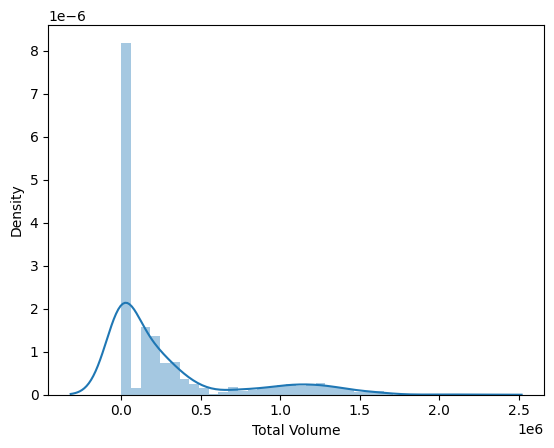

In [10]:
# testing for normality
sns.distplot(avos['Total Volume'])

In [11]:
# positively skewed - square rooting data
avos['Total VolumeSQRT']=np.sqrt(avos['Total Volume'])

/var/folders/xf/chkgnkz55mvbhswk6vjbb9680000gn/T/ipykernel_5018/2429326878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avos['Total VolumeSQRT']=np.sqrt(avos['Total Volume'])


/var/folders/xf/chkgnkz55mvbhswk6vjbb9680000gn/T/ipykernel_5018/1827402569.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(avos['Total VolumeSQRT'])


<AxesSubplot: xlabel='Total VolumeSQRT', ylabel='Density'>

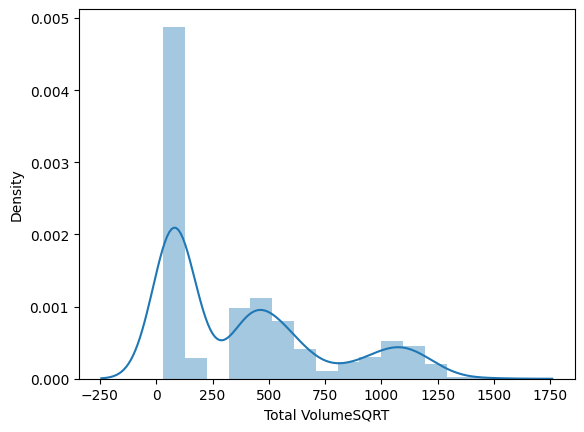

In [12]:
sns.distplot(avos['Total VolumeSQRT'])

In [13]:
# attempting log
avos['Total VolumeLOG']=np.log(avos['Total Volume'])

/var/folders/xf/chkgnkz55mvbhswk6vjbb9680000gn/T/ipykernel_5018/3301280202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avos['Total VolumeLOG']=np.log(avos['Total Volume'])


/var/folders/xf/chkgnkz55mvbhswk6vjbb9680000gn/T/ipykernel_5018/515020527.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(avos['Total VolumeLOG'])


<AxesSubplot: xlabel='Total VolumeLOG', ylabel='Density'>

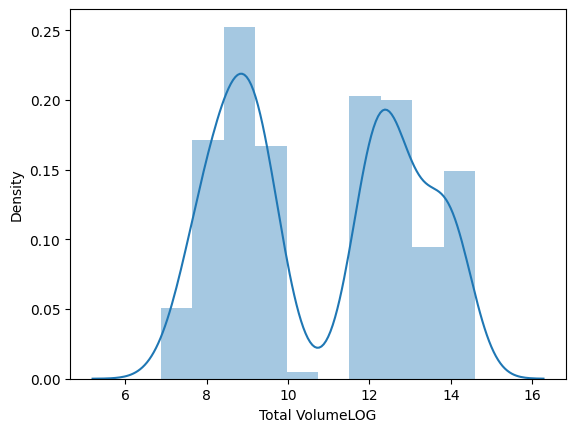

In [14]:
sns.distplot(avos['Total VolumeLOG'])

In [15]:
# keeping log histogram

In [17]:
# performing bartlett test
scipy.stats.bartlett(avos['Total VolumeLOG'], avos['region'])

BartlettResult(statistic=883.7919675933721, pvalue=3.2755760094735546e-194)

In [18]:
# testing equal variance
stats.f_oneway(avocados['Total Volume'][avocados['region']=='Indianapolis'],
                    avocados['Total Volume'][avocados['region']=='Orlando'],
                    avocados['Total Volume'][avocados['region']=='PhoenixTucson'])

F_onewayResult(statistic=174.05378837225294, pvalue=1.101276256457687e-65)

In [19]:
# computing post hoc
postHoc=MultiComparison(avos['Total VolumeLOG'], avos['region'])
postHocResults=postHoc.tukeyhsd()
print(postHocResults)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     0      1   0.4292 0.0253 0.0424  0.816   True
     0      2   1.4766    0.0 1.0898 1.8634   True
     1      2   1.0474    0.0 0.6606 1.4342   True
--------------------------------------------------


In [20]:
# computing means
avos.groupby('region').mean()

,Total Volume,Total VolumeSQRT,Total VolumeLOG
region,,,
0,89536.661036,240.446599,10.157564
1,173552.378373,324.645892,10.586744
2,578826.368343,585.837880,11.634171


In [21]:
# phoenixtucson(2) has the highest total volume of avocados